## Downloading the STL 10 Dataset

In [1]:
!gdown --id 1n6Hy6JizkzBiF_iri92d7pmZzDg8ch_3   # The Python file for downloading STL10 - https://github.com/mttk/STL10/blob/master/stl10_input.py

Downloading...
From: https://drive.google.com/uc?id=1n6Hy6JizkzBiF_iri92d7pmZzDg8ch_3
To: /content/stl10_input.py
100% 4.55k/4.55k [00:00<00:00, 8.69MB/s]


In [2]:
# Importing all the required libraries

import matplotlib.pyplot as plt
import stl10_input

!pip uninstall -y tensorflow
!pip install tensorflow==1.14
!pip install tensorflow-gpu==1.14

import tensorflow.keras as keras

sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)
Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 109.3MB 38kB/s 
     |████████████████████████████████| 491kB 39.0MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 3.2MB 39.3MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
     |████████████████████████████████| 377.1MB 45kB/s 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
# Downloading the STL-10 dataset. 

!python /content/stl10_input.py   

sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [4]:
# Reading the train and test images

train_images = stl10_input.read_all_images('/content/data/stl10_binary/train_X.bin')
train_labels = stl10_input.read_labels('/content/data/stl10_binary/train_y.bin')
test_images = stl10_input.read_all_images('/content/data/stl10_binary/test_X.bin')
test_labels = stl10_input.read_labels('/content/data/stl10_binary/test_y.bin')

In [5]:
# Mapping the object related to the label, according to STL-10 dataset. 

objects = {0: 'airplane', 
          1: 'bird', 
          2: 'car', 
          3: 'cat', 
          4: 'deer', 
          5: 'dog', 
          6: 'horse', 
          7: 'monkey', 
          8: 'ship', 
          9: 'truck'
          }

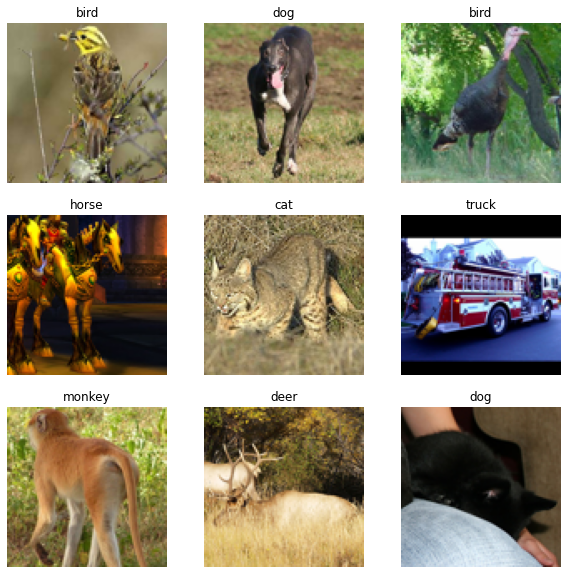

In [6]:
# Visualising some images

plt.figure(figsize=(10, 10))
for i, image, label in zip(range(9), train_images, train_labels):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(objects[label - 1])
    plt.axis("off")

In [7]:
print("Train Images:", len(train_images))
print("Test Images:", len(test_images))

Train Images: 5000
Test Images: 8000


In [8]:
for i in range(1, 11):
  print(objects[i - 1], ":", train_labels.tolist().count(i))

airplane : 500
bird : 500
car : 500
cat : 500
deer : 500
dog : 500
horse : 500
monkey : 500
ship : 500
truck : 500


The dataset is balanced.

## Correcting Data Format and Preproccesing

In [9]:
# As the labels start from 1 to 10, changing the the range to 0 - 9.

train_y = train_labels - 1
test_y = test_labels - 1

In [10]:
# Preprocessing the images and coverting the labels into categorical dataset. 

X_train = keras.applications.resnet50.preprocess_input(train_images)
X_test = keras.applications.resnet50.preprocess_input(test_images)
y_train = keras.utils.to_categorical(train_y, 0)
y_test = keras.utils.to_categorical(test_y, 0)

In [11]:
# Function to plot graphs for model accuracy and loss. 

def plot_history(history):

  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

## Calling a pretrained Resnet50 model. 

In [12]:
pretrained_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

    8192/94653016 [..............................] - ETA: 1s

/usr/local/lib/python3.7/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step


## Freezing and Training

Freezing the Resnet50 model because when the model trains the new top layer, the gradient updates will be high, which can destroy the pretrained weights learned by the model.  

In [13]:
pretrained_model.trainable = False

Adding a Global Average Pooling Layer and adding a Dropout layer for regularization (i.e. to prevent overfitting). Adding the training=False parameter in the pretrained model layer so as to run batch norm layers in  inference mode, so they will not update their mean and variance parameters as this has the potential to destroy the learning of the model. Also, the STL-10 dataset is similar to imagenet so, no need to update the mean and variance of the batchnorm layer. 

Using the test images as the validation dataset to check the performance of the model. 

In [14]:
inputs = keras.Input(shape=(96, 96, 3))
x = pretrained_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________
None
Train on 5000 samples, validate on 8000 samples
Epoch 1/4
5000/5000 [==============================] - 34

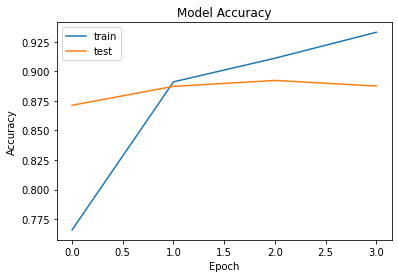

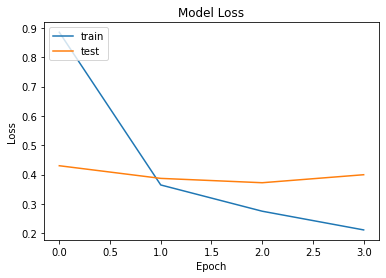

In [15]:
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=4, validation_data=(X_test, y_test))

plot_history(history)

The model gives good accuracy just after running three epochs. Now fine tuning the model by using a lower learning rate so that no major updates get made and unfreezing the Resnet50 layers (except the batchnorm as the model still runs in inference mode). 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________
None
Train on 5000 samples, validate on 8000 samples
Epoch 1/3
5000/5000 [==============================] - 63

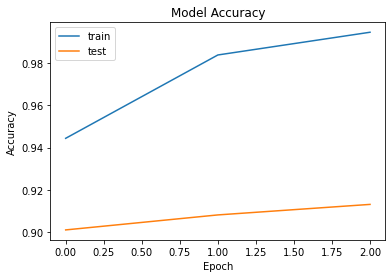

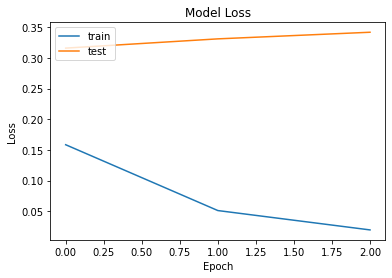

In [16]:
pretrained_model.trainable = True
 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.00001), metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_test, y_test))

plot_history(history)

The accuracy of the model has improved by finetuning the model. Used accuracy as the performance metric for the model as it is reliable in classification problems and the dataset is balanced. 

## Training without Freezing

### Keeping a high learning rate!

Keeping a high learning rate to train the unfreezed model from the beginning to check how the model performs. 

/usr/local/lib/python3.7/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________
None
Train on 5000 samples, validate on 8000 samples
Epoch 1/15
5000/5000 [==============================] -

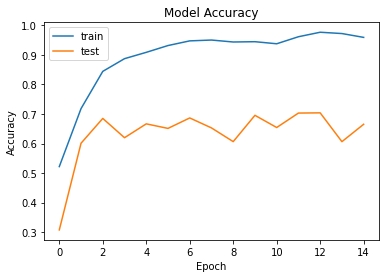

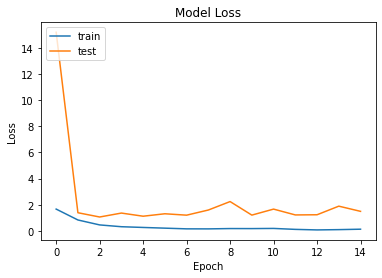

In [17]:
pretrained_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
pretrained_model.trainable = True

inputs = keras.Input(shape=(96, 96, 3))
x = pretrained_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

plot_history(history)

As can be seen by the results, the performance by the model is erratic and the accuracy is also not up to the previous model standards. 

### Keeping a low learning rate!

Keeping a low learning rate, so the weight updates will be small and the pretrained features will not be destroyed by the training. But not freezing any layers. 

/usr/local/lib/python3.7/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________
None
Train on 5000 samples, validate on 8000 samples
Epoch 1/15
5000/5000 [==============================] -

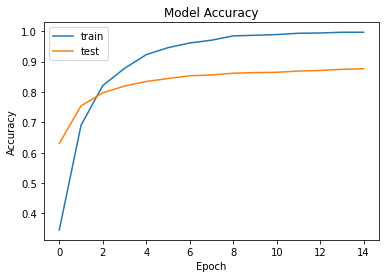

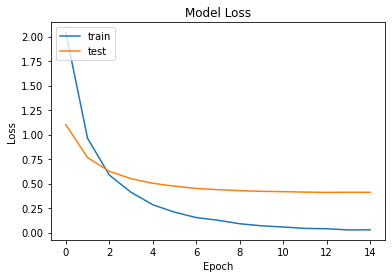

In [18]:
pretrained_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
pretrained_model.trainable = True

inputs = keras.Input(shape=(96, 96, 3))
x = pretrained_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.00001), metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

plot_history(history)

The model performs well but still the performance by first freezing the layers and then unfreezing is better. 

# Conclusion 

If we keep a low enough learning rate, then we can train a pre-trained resnet50 model on STL-10 dataset getting good results. 

Though, freezing the pretrained layers, training the new layers to update well to the dataset, and then unfreezing the pretrained layers to fine tune the whole model weights according to the STL-10 dataset gives better results. 